In [1]:
# this lets us use the figures interactively
%matplotlib inline

import os
import geopandas as gpd
import matplotlib.pyplot as plt
from cartopy.feature import ShapelyFeature
import cartopy.crs as ccrs
import matplotlib.patches as mpatches
import matplotlib.lines as mlines

plt.ion() # make the plotting interactive

In [2]:
# generate matplotlib handles to create a legend of the features we put in our map.
def generate_handles(labels, colors, edge='k', alpha=1):
    lc = len(colors)  # get the length of the color list
    handles = []
    for i in range(len(labels)):
        handles.append(mpatches.Rectangle((0, 0), 1, 1, facecolor=colors[i % lc], edgecolor=edge, alpha=alpha))
    return handles

In [3]:
def scale_bar(ax, location=(0.92, 0.95)):
    x0, x1, y0, y1 = ax.get_extent()
    sbx = x0 + (x1 - x0) * location[0]
    sby = y0 + (y1 - y0) * location[1]

    ax.plot([sbx, sbx - 20000], [sby, sby], color='k', linewidth=9, transform=ax.projection)
    ax.plot([sbx, sbx - 10000], [sby, sby], color='k', linewidth=6, transform=ax.projection)
    ax.plot([sbx-10000, sbx - 20000], [sby, sby], color='w', linewidth=6, transform=ax.projection)

    ax.text(sbx, sby-4500, '20 km', transform=ax.projection, fontsize=8)
    ax.text(sbx-12500, sby-4500, '10 km', transform=ax.projection, fontsize=8)
    ax.text(sbx-24500, sby-4500, '0 km', transform=ax.projection, fontsize=8)


In [4]:
#import data file: flood, buildings, roads, population excel file, county outline, sa outline
flood= gpd.read_file(os.path.abspath('Project_datafiles/Flood_2m.shp'))
roads= gpd.read_file(os.path.abspath('Project_datafiles/Fermanagh_roads.shp'))
buildings= gpd.read_file(os.path.abspath('Project_datafiles/Building_Fermanagh.shp'))
pop_demography=gpd.read_file(os.path.abspath('Project_datafiles/pop_demography.csv'))
outline = gpd.read_file(os.path.abspath('Project_datafiles/Fermanagh_DCA.shp'))
small_area= gpd.read_file(os.path.abspath('Project_datafiles/SA_poly.shp'))
land_cover= gpd.read_file(os.path.abspath('Project_datafiles/LC_Fermanagh.shp'))

In [48]:
population = gpd.sjoin(pop_demography, small_area) # perform the spatial join

C:\Users\dubuc\AppData\Local\Temp\ipykernel_18484\3079990068.py:1: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: None
Right CRS: EPSG:29902

  population = gpd.sjoin(pop_demography, small_area) # perform the spatial join


In [45]:
flood.to_crs(epsg = 2157)
roads.to_crs(epsg = 2157)
buildings.to_crs(epsg = 2157)
outline.to_crs(epsg = 2157)
small_area.to_crs(epsg = 2157)
land_cover.to_crs(epsg = 2157)

,SEGID,TOTPIXELS,COREPIXELS,BHSUB,LAND_COVER,Shape_Leng,Shape_Area,geometry
0,H000009r1,1785,1040,6.1,Neutral grass,20700.000000,1.115625e+06,"POLYGON ((597303.594 849201.689, 597303.594 84..."
1,H000015r1,2031,1419,7.1,Calcareous grass,17300.000000,1.269375e+06,"POLYGON ((593529.434 854200.632, 593529.434 85..."
2,H000017r1,5148,3700,10.2,Open dwarf shrub heath,33365.445406,2.699577e+06,"POLYGON ((599078.292 864323.421, 599078.291 86..."
3,H000023r1,0,0,12.1,Bog,4630.182956,4.091334e+05,"MULTIPOLYGON (((624405.618 823638.054, 624405...."
4,H000025r1,0,0,12.1,Bog,5076.466263,2.692242e+05,"MULTIPOLYGON (((614628.752 828910.970, 614628...."
...,...,...,...,...,...,...,...,...
37831,H172275r1,23,17,16.1,Inland Bare Ground,700.000000,1.437500e+04,"POLYGON ((628854.899 868778.303, 628829.904 86..."
37832,H172276r1,23,5,10.2,Open dwarf shrub heath,750.000000,1.437500e+04,"POLYGON ((629354.791 868728.311, 629354.791 86..."
37833,H172277r1,34,7,10.2,Open dwarf shrub heath,1100.000000,2.125000e+04,"POLYGON ((629354.791 868728.311, 629329.796 86..."
37834,H172278r1,36,8,12.1,Bog,1050.000000,2.250000e+04,"POLYGON ((629454.769 868678.321, 629429.774 86..."


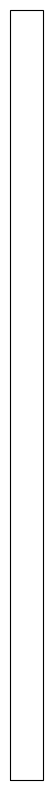

In [6]:
myFig = plt.figure(figsize=(10, 10))  # create a figure of size 10x10 (representing the page size in inches)

myCRS = ccrs.UTM(29)  # create a Universal Transverse Mercator reference system to transform our data.
# be sure to fill in XX above with the correct number for the UTM Zone that Northern Ireland is part of.

ax = plt.axes(projection=myCRS)  # finally, create an axes object in the figure, using a UTM projection,
# where we can actually plot our data.

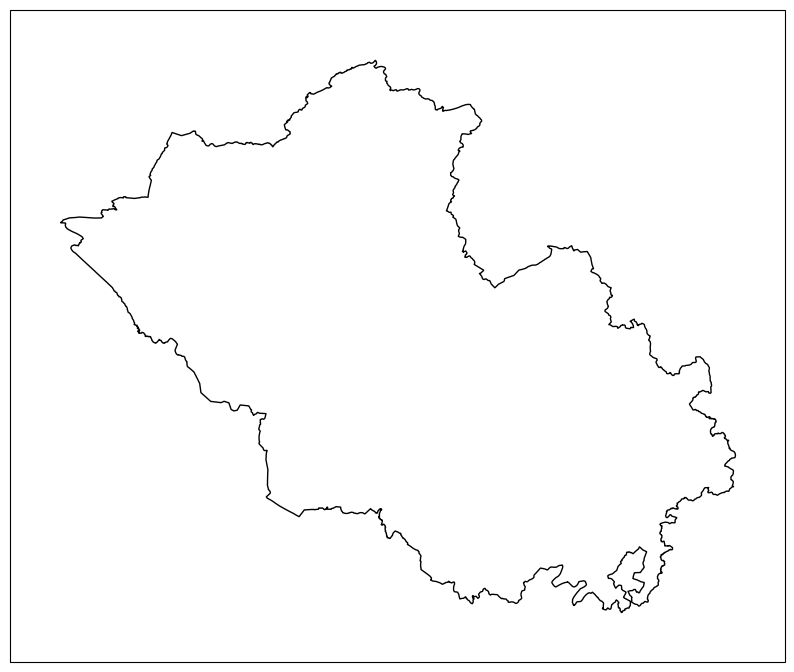

In [7]:
# first, we just add the outline of Northern Ireland using cartopy's ShapelyFeature
outline_feature = ShapelyFeature(outline['geometry'], myCRS, edgecolor='k', facecolor='w')
xmin, ymin, xmax, ymax = outline.total_bounds
ax.add_feature(outline_feature) # add the features we've created to the map.
ax.set_extent([xmin-5000, xmax+5000, ymin-5000, ymax+5000], crs=myCRS)
myFig

In [8]:
# get the number of unique municipalities we have in the dataset
landcover_type = len(land_cover.LAND_COVER.unique())
print('Number of unique features: {}'.format(landcover_type))
landcover_type=list(land_cover.LAND_COVER.unique())

Number of unique features: 14


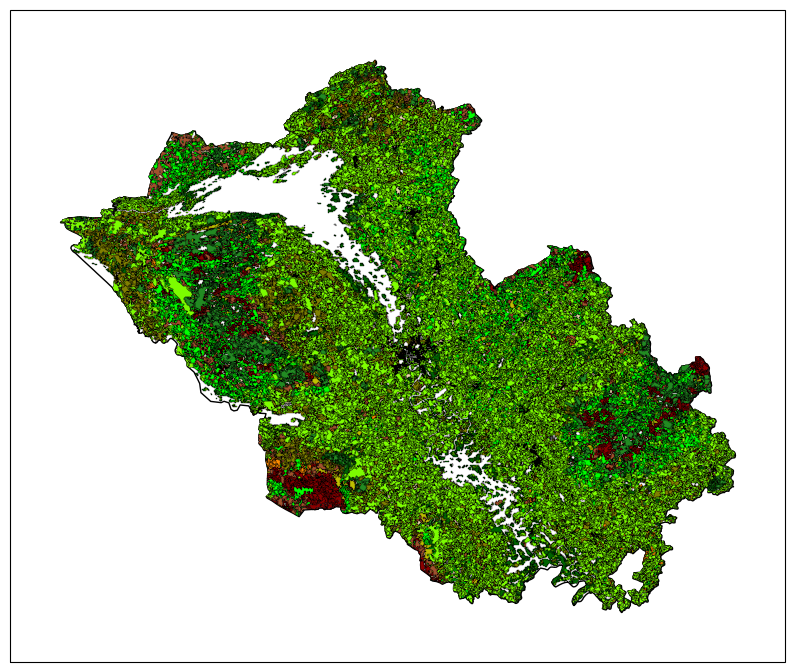

In [9]:
landcover_colors = ['lawngreen','olive', 'sienna','darkred', 'chartreuse', 'forestgreen','lime', 'y','darkgreen','darkorange','lightgrey','wheat','black','grey']
for ii, name in enumerate(landcover_type):
    feat = ShapelyFeature(land_cover.loc[land_cover['LAND_COVER'] == name, 'geometry'], # first argument is the geometry
                          myCRS, # second argument is the CRS
                          edgecolor='k', # outline the feature in black
                          facecolor=landcover_colors[ii], # set the face color to the corresponding color from the list
                          linewidth=0.25) # set the outline width to be 1 pt
                           # set the alpha (transparency) to be 0.25 (out of 1)
    ax.add_feature(feat)
myFig

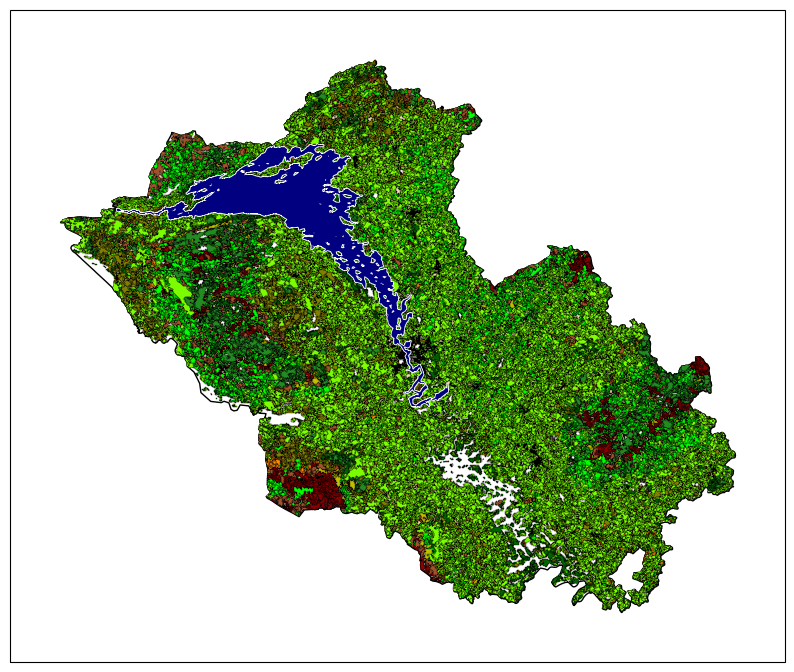

In [32]:
flood_feature = ShapelyFeature(flood['geometry'], myCRS, edgecolor='w', facecolor='navy', linewidth=0.1)
ax.add_feature(flood_feature)
myFig

In [39]:
landcover_handles = generate_handles(land_cover.LAND_COVER.unique(), landcover_colors)
flood_handles = generate_handles(['Flood'], ['navy'])

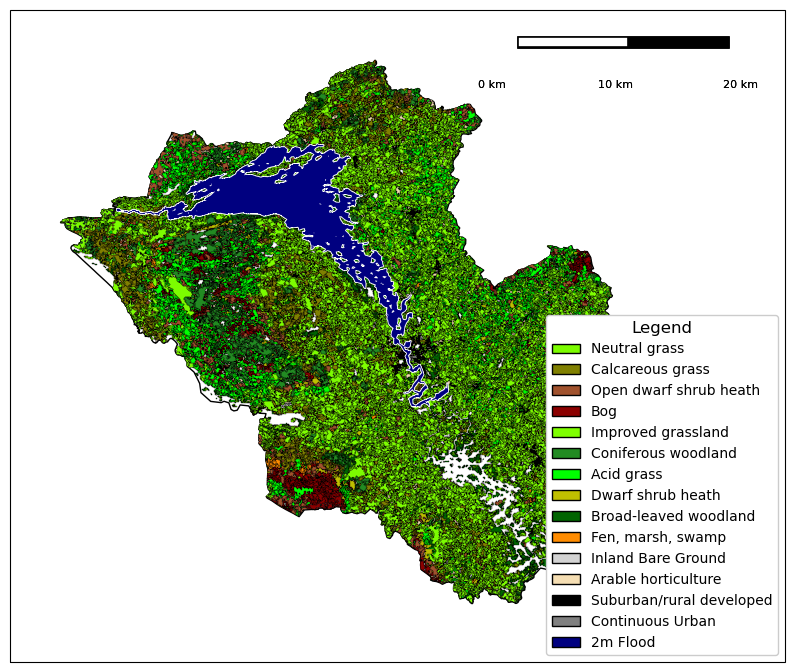

In [43]:
# ax.legend() takes a list of handles and a list of labels corresponding to the objects
# you want to add to the legend
handles = landcover_handles + flood_handles # use '+' to concatenate (combine) lists
labels = landcover_type + ['2m Flood']

leg = ax.legend(handles, labels, title='Legend', title_fontsize=12,
                 fontsize=10, loc='lower right', frameon=True, framealpha=1)

gridlines = ax.gridlines(draw_labels=True, # draw  labels for the grid lines
                         xlocs=[-8, -7.5, -7, -6.5, -6, -5.5], # add longitude lines at 0.5 deg intervals
                         ylocs=[54, 54.5, 55, 55.5]) # add latitude lines at 0.5 deg intervals
gridlines.left_labels = False # turn off the left-side labels
gridlines.bottom_labels = False

scale_bar(ax)
myFig # to show the updated figure

In [10]:
#create % column for elderly and child ?

In [11]:
#join sa shape file with excel pop file

In [12]:
#create column pop density

In [13]:
#all data shapefile clipped to flood polygon with within

In [14]:
#analyses:-tot pop in flood polygon
#         - nbr resident houses
#         - tot length of road impacted and class A roas
#         - Sa with highest pop density and if any are adjacent
#         - SA with less than avg pop density
#         - which landcover types has highest area in flood poly
#         - total area flooded per landcover types
#         - SA with highest % of elderly/child
#         - SA with low pop density but high child %
#         - SA with medical building
#         - residential building furtherest from medical build (use original dataset ?)
#         - SA centre furthest from medical building

In [15]:
#add scale and legend handle

In [16]:
#create map and add features to map
# do second map with landcover

In [17]:
#different labels depending on building class and road class

In [18]:
#grid lines